# Importing Required Libraries

In [73]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import linear_model
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

# Loading Dataset

In [74]:
df_country = pd.read_csv(r"C:\Users\rakhi\Downloads\zomato.csv", encoding='latin-1')

In [75]:
df_country_code = pd.read_excel(r"C:\Users\rakhi\Downloads\Country-Code.xlsx")

In [76]:
df_country.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [77]:
df_country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [78]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Combining Datasets

#### Now, we will merge the two tables on Country Code and find out distributions of restaurants in dataset.

In [79]:
df_country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


In [80]:
df_m = pd.merge(df_country, df_country_code, on="Country Code", how="left")
df_m.groupby("Country").agg(Total_Count=("Restaurant ID","count")).sort_values(by="Total_Count",ascending=False)

,Total_Count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


As we can see majority of the data is from India. From now on we will do our analysis only on restaurants present in India.

In [81]:
df =df_m[df_m["Country"]=="India"].reset_index(drop=True).copy()

In [82]:
# checking null values
df_m.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

## Data Preprocessing

In [83]:
# checking for duplicate values
print("Before:"+str(df.shape[0]))
df.drop_duplicates(inplace=True)
print("After:"+str(df.shape[0]))

Before:8652
After:8652


Our data looks clean. There are no missing values as well as there are no duplicates.

In [84]:
df.rename(columns={"Restaurant ID":"restaurant_id","Restaurant Name":"restaurant_name","Country Code":"country_code",
                           "Locality Verbose":"locality_verbose","Average Cost for two":"average_cost_two","Has Table booking":"table_booking",
                           "Has Online delivery":"online_delivery","Is delivering now":"is_delivering_now","Switch to order menu":"switch_to_order",
                           "Price range":"price_range","Aggregate rating":"agg_rating","Rating color":"rating_color","Rating text":"rating_text"},inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8652 entries, 0 to 8651
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   restaurant_id      8652 non-null   int64  
 1   restaurant_name    8652 non-null   object 
 2   country_code       8652 non-null   int64  
 3   City               8652 non-null   object 
 4   Address            8652 non-null   object 
 5   Locality           8652 non-null   object 
 6   locality_verbose   8652 non-null   object 
 7   Longitude          8652 non-null   float64
 8   Latitude           8652 non-null   float64
 9   Cuisines           8652 non-null   object 
 10  average_cost_two   8652 non-null   int64  
 11  Currency           8652 non-null   object 
 12  table_booking      8652 non-null   object 
 13  online_delivery    8652 non-null   object 
 14  is_delivering_now  8652 non-null   object 
 15  switch_to_order    8652 non-null   object 
 16  price_range        8652 

In [86]:
df.describe()

,restaurant_id,country_code,Longitude,Latitude,average_cost_two,price_range,agg_rating,Votes
count,8.652000e+03,8652.0,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000,8652.000000
mean,8.657085e+06,1.0,72.856786,26.420652,623.370319,1.721683,2.523324,137.212552
std,8.959437e+06,0.0,18.017536,6.976576,595.676124,0.852544,1.510986,428.039513
min,5.300000e+01,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.007402e+05,1.0,77.098797,28.491425,300.000000,1.000000,2.100000,4.000000
50%,2.200006e+06,1.0,77.203468,28.569869,450.000000,2.000000,3.100000,24.000000
75%,1.836120e+07,1.0,77.285356,28.637857,700.000000,2.000000,3.600000,100.000000
max,1.850065e+07,1.0,91.806493,35.000000,8000.000000,4.000000,4.900000,10934.000000


## Exploring the data

In [87]:
df["City"].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

We found that most of the restaurants are located in National Capital Region (NCR) in India. The NCR region consists of New Delhi and surrounding cities i.e Ghaziabad, Faridabad, Gurgaon and Noida.

# Data Visualizations

### Top 20 restaurant

In [88]:
df.restaurant_name.value_counts().head()

restaurant_name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: count, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

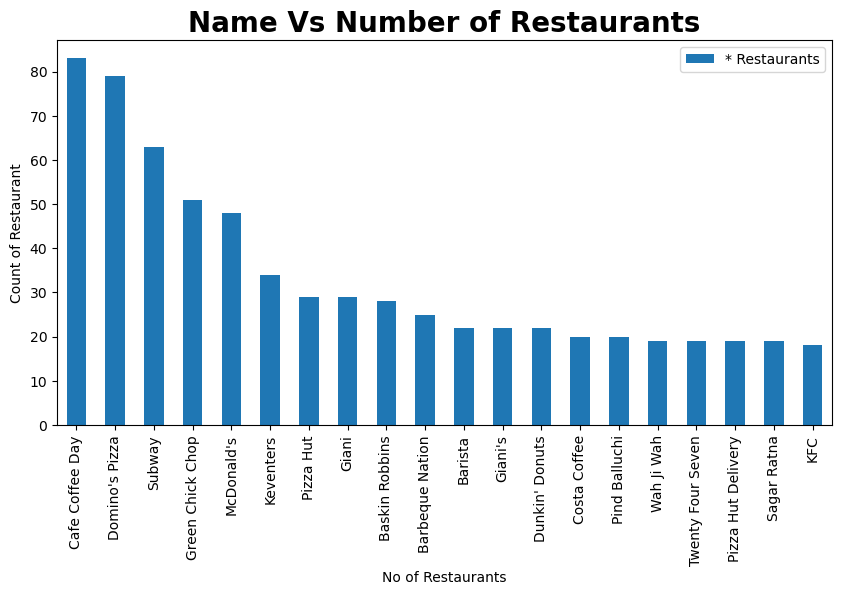

In [89]:
plt.figure(figsize=(10,5))
ax =df.restaurant_name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

We can say that 'Cafe Coffee Day' has highest count among all.

### Restaurants accepting online orders

online_delivery
No     6229
Yes    2423
Name: count, dtype: int64

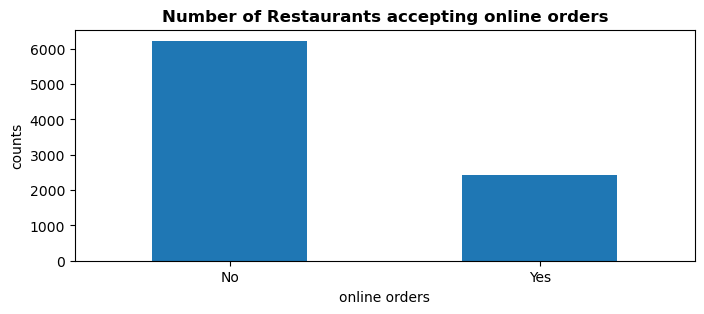

In [90]:
plt.figure(figsize=(8,3))
ax =df.online_delivery.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')
plt.xticks(rotation=0)

df.online_delivery.value_counts()

Most of restaurants are not accepting online order.

### Type of Restaurants

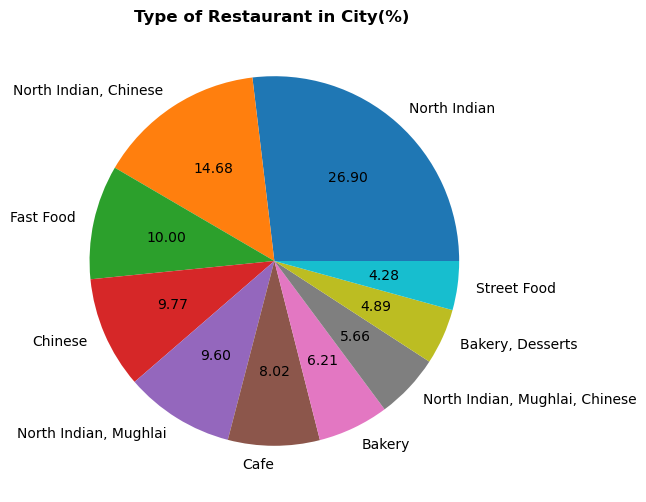

In [91]:
plt.figure(figsize=(8,6))
values = df.Cuisines.value_counts()[:10]
labels = df['Cuisines'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

26.58% Restauraqnts have 'North Indian' cuisine.

### Restaurants That are Delivering Now

is_delivering_now
No     8618
Yes      34
Name: count, dtype: int64

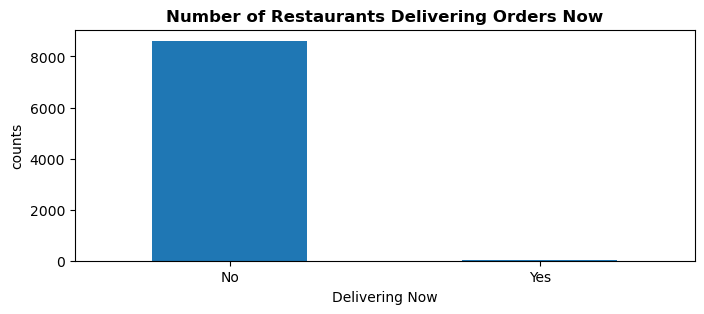

In [92]:
plt.figure(figsize=(8,3))
ax =df.is_delivering_now.value_counts().plot(kind='bar')
plt.title('Number of Restaurants Delivering Orders Now', weight='bold')
plt.xlabel('Delivering Now')
plt.ylabel('counts')
plt.xticks(rotation=0)

df.is_delivering_now.value_counts()

Most of the Restaurants are not delivering oreders now.

### Table Booking Option

table_booking
No     7541
Yes    1111
Name: count, dtype: int64

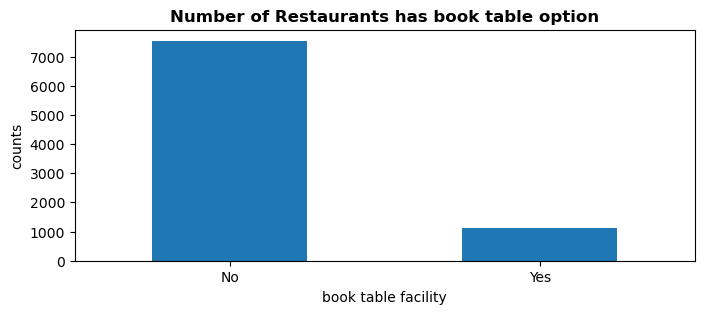

In [93]:
plt.figure(figsize=(8,3))
ax =df.table_booking.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')
plt.xticks(rotation=0)

df.table_booking.value_counts()

Most of the Restaurants have not facility for booking table.

### Locality

Text(0, 0.5, 'counts')

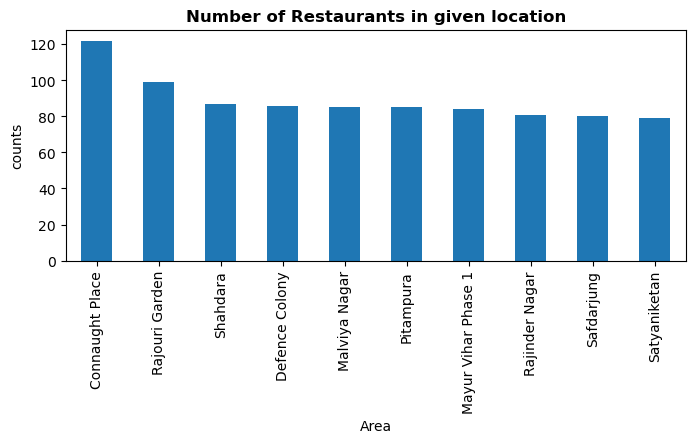

In [94]:
plt.figure(figsize=(8,3))
ax =df.Locality.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

The highest number of restaurants are at the Connaught Place.

### Price Range

price_range
1    4295
2    2858
3    1111
4     388
Name: count, dtype: int64

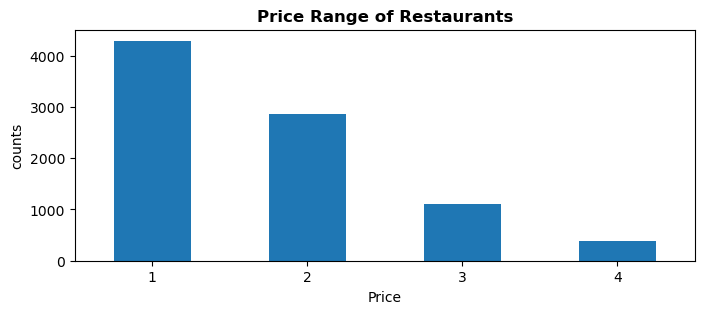

In [95]:
plt.figure(figsize=(8,3))
ax =df.price_range.value_counts().plot(kind='bar')
plt.title('Price Range of Restaurants', weight='bold')
plt.xlabel('Price')
plt.ylabel('counts')
plt.xticks(rotation=0)

df.price_range.value_counts()

### Average Cost For Two

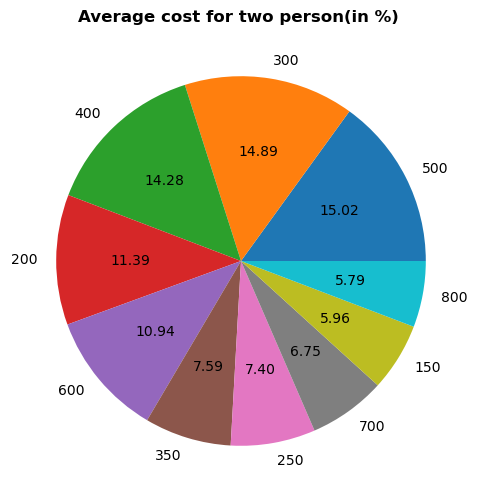

In [96]:
plt.figure(figsize=(8,6))
values = df.average_cost_two.value_counts()[:10]
labels = df['average_cost_two'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()

There is 14.92% chances that for two person average cost for two persons will be 500 and 14.87% chance that cost will be 300 so on.

## Splitting the data for Model Building

In [97]:
# drop redudant columns
df.drop(columns=['country_code','Country','Votes','Cuisines', 'rating_color', 'rating_text', 'Currency', 'is_delivering_now',
                   'switch_to_order', 'Latitude', 'Longitude','City', 'Locality', 'restaurant_name'], inplace  =True)

In [98]:
df.drop(columns=['Address', 'locality_verbose'], inplace = True)

In [99]:
df["table_booking"]=df["table_booking"].map({"Yes":1,"No":0})
df["online_delivery"]=df["online_delivery"].map({"Yes":1,"No":0})

In [100]:
# build x & y dataset
x = df.drop(['average_cost_two'],axis = 1)
y = df['average_cost_two']

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3,random_state = 33)

In [102]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (6056, 5)
X_test shape: (2596, 5)
Y_train shape: (6056,)
Y_test shape: (2596,)


# Data Modelling

In [103]:
def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

## Building a Random model (Finding worst-case MSE)

In [104]:
rand_pred= np.zeros(Y_test.shape[0])
for i in range(Y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(Y_test, rand_pred)

744666.7421489984

### Linear Regression

In [105]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

mse(Y_test, y_pred_lr)

98014.7109520574

### SGD Regressor

In [106]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,Y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(Y_test, y_pred_sgdr)

3.062013681879617e+45

### Random Forest Regressor

In [107]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

mse(Y_test, y_pred_rfr)

50365.02428561711

#### Without any hyper param tuning SGDRegressor  it learning something. so let experiment on SGD.

# Hyperparam Tuning

In [109]:
tuned_parameters = {'random_state': [250,500,1000,1200]}

grd_regressor = GridSearchCV(linear_model.SGDRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, Y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'random_state': [250, 500, 1000, 1200]},
             scoring=make_scorer(mse, greater_is_better=False, response_method='predict'),
             verbose=1)

### Best Parameter Model

In [113]:
sgd = linear_model.SGDRegressor(random_state=42)
sgd.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

mse(Y_test, y_pred_rfr)

50365.02428561711

### Output Visualization

In [114]:
Randpred = pd.DataFrame({ "actual": Y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
6571,900,684.000000
4151,200,264.500000
5014,100,246.866667
924,200,350.000000
5047,350,293.500000
...,...,...
4092,300,391.000000
5359,500,517.500000
7846,350,201.500000
2491,2100,3212.000000


# Predicting Price Range

In [115]:
# build x & y dataset
x = df.drop(['price_range'],axis = 1)
y = df['price_range']

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3,random_state = 33)

In [117]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (6056, 5)
X_test shape: (2596, 5)
Y_train shape: (6056,)
Y_test shape: (2596,)


# Data Modelling

In [118]:
def mse(y, y_pred):
    return np.mean((y_pred - y)**2) 

mse_scorer = make_scorer(mse, greater_is_better=False)

### Building a Random model (Finding worst-case MSE)

In [119]:
rand_pred= np.zeros(Y_test.shape[0])
for i in range(Y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(Y_test, rand_pred)

3.738194915254237

### Linear Regression

In [120]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)

mse(Y_test, y_pred_lr)

0.20419023368243425

### SGD Regressor

In [121]:
sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,Y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(Y_test, y_pred_sgdr)

4.121831116440108e+43

### Random Forest Regressor

In [122]:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

mse(Y_test, y_pred_rfr)

0.00984899845916795

#### Without any hyper param tuning RFR ie Random Forest Regressor it learning something. so let experiment on RFR.

# Hyperparam Tuning

In [123]:
tuned_parameters = {'n_estimators': [250,500,1000,1200]}

grd_regressor = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=10, 
                   n_jobs=-1, verbose=1, scoring=mse_scorer)
grd_regressor.fit(X_train, Y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [250, 500, 1000, 1200]},
             scoring=make_scorer(mse, greater_is_better=False, response_method='predict'),
             verbose=1)

## Best Parameter Model

In [127]:
rfr = RandomForestRegressor(max_depth=None,n_estimators=200,min_samples_split= 2)
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)

mse(Y_test, y_pred_rfr)

0.010119655238828967

## Output Visualization

In [128]:
Randpred = pd.DataFrame({ "actual": Y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
6571,2,2.0
4151,1,1.0
5014,1,1.0
924,1,1.0
5047,1,1.0
...,...,...
4092,1,1.0
5359,2,2.0
7846,1,1.0
2491,4,4.0
